In [32]:
import os
import numpy as np
import pandas as pd

In [33]:
DATA_DIR = '/home/simplon/Documents/aclImdb'
target_names = ['neg', 'pos']
# On crée une liste tout les noms des sous dossier dans le dossier eron
subfolders = ['train','test']

#On crée une liste X qui contiendra tout les email
X = []
#On crée une liste y qui contiendra 1 si spam 0 sinon.
y = []

for subfolder in subfolders:
    
    #On crée une liste de tout les fichier contenue le dossier spam de chaque sous-dossier
    neg_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'neg'))
    for neg_file in neg_files:
        with open(os.path.join(DATA_DIR, subfolder, 'neg', neg_file), encoding='ascii', errors='ignore') as f:
            X.append(f.read())
            y.append(0)
            
    pos_files = os.listdir(os.path.join(DATA_DIR, subfolder, 'pos'))
    for pos_file in pos_files:
        with open(os.path.join(DATA_DIR, subfolder, 'pos', pos_file), encoding='ascii', errors='ignore') as f:
            X.append(f.read())
            y.append(1)

data = pd.DataFrame()
data["text"]=X
data["y"]=y
data["y"].value_counts()

1    25000
0    25000
Name: y, dtype: int64

In [34]:
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# def remove_html(text):
#     html=re.compile(r'<.*?>')
#     return html.sub(r' ',text)

# # retire 
# def remove_things(text):
#     html=re.compile("[^a-zA-Z\s']")
#     return html.sub(' ',text)

# #Remove stopwords & Punctuations
# from nltk.corpus import stopwords
# ", ".join(stopwords.words('english'))
# STOPWORDS = set(stopwords.words('english'))

# def remove_stopwords(text):
#     """custom function to remove the stopwords"""
#     return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# data["text"] = data["text"].apply(lambda x:remove_html(x))
# data["text"] = data["text"].apply(lambda x:remove_things(x))
# data["text"] = data["text"].apply(lambda x:remove_stopwords(x))

X_1, X_2, y_1, y_2 = train_test_split(data["text"], data["y"], test_size=0.04)

In [35]:
count_vec = CountVectorizer(stop_words={'english'})
X_counts = count_vec.fit_transform(X_2)

X_counts = pd.DataFrame(X_counts.toarray(),columns = list(count_vec.vocabulary_.keys()))

X_counts

,since,the,title,is,in,and,imdb,lists,this,show,...,textures,buries,absolve,cantankerous,wuxia,fatiguing,behalf,exertions,airspeed,iversen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Kmeans pour trouver le nombre de cluster

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
cluster = [i for i in range(2,10)]
inertie = []
silhouette = []

for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X_counts)
    
    inertie.append(clustering.inertia_)
    silhouette.append(silhouette_score(X_counts, clustering.labels_))
    
    print(
        'clustering.inertia_ : ', clustering.inertia_,
         'silhouette_score : ', silhouette_score(X_counts, clustering.labels_)
         )

clustering.inertia_ :  840214.5105061027 silhouette_score :  0.4947927250514315
clustering.inertia_ :  752088.8332297183 silhouette_score :  0.28986726303475985
clustering.inertia_ :  716947.3214974512 silhouette_score :  0.1814460246334041
clustering.inertia_ :  698423.1532945726 silhouette_score :  0.07651744144904726
clustering.inertia_ :  686976.8637202685 silhouette_score :  0.06790408434692707
clustering.inertia_ :  678809.3311171421 silhouette_score :  0.04303846145516191
clustering.inertia_ :  673032.4606510586 silhouette_score :  0.054710275460461005
clustering.inertia_ :  666825.0084145152 silhouette_score :  0.05107257469524115


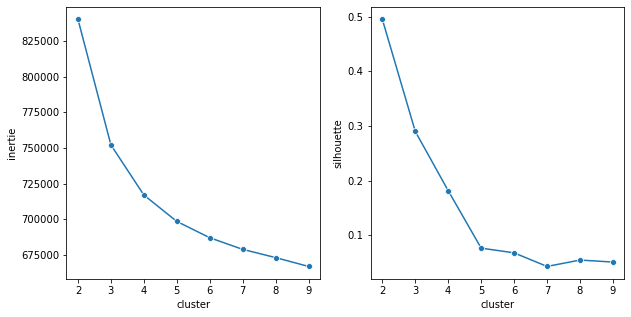

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({'cluster':cluster, 'inertie':inertie,
                     'silhouette':silhouette})

plt.figure(figsize=[10,5])

plt.subplot(121)
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')
plt.subplot(122)
sns.lineplot(data=data, x="cluster", y="silhouette", marker='o');

In [39]:
k = 5
clustering = KMeans(n_clusters=k, random_state=42)
clustering.fit(X_counts)

KMeans(n_clusters=5, random_state=42)

In [40]:
X_counts['cluster_']=clustering.predict(X_counts)

In [72]:
X_counts

,since,the,title,is,in,and,imdb,lists,this,show,...,absolve,cantankerous,wuxia,fatiguing,behalf,exertions,airspeed,iversen,cluster_,cluster2_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0


In [75]:
for i in range(1,6):
    print('Cluster ', i-1, ' : ',
          X_counts.iloc[:,:-2][X_counts.cluster_==i-1].mean().sort_values(ascending=False).head(10).index.to_list(), '\n')

Cluster  0  :  ['snobby', 'departure', 'menschkeit', 'archibald', 'snide', 'vaguely', 'polynesian', 'veronika', 'erbil', 'anthem'] 

Cluster  1  :  ['snobby', 'departure', 'menschkeit', 'archibald', 'vaguely', 'snide', 'veronika', 'polynesian', 'anthem', 'erbil'] 

Cluster  2  :  ['snobby', 'departure', 'menschkeit', 'archibald', 'snide', 'veronika', 'vaguely', 'polynesian', 'anthem', 'erbil'] 

Cluster  3  :  ['snobby', 'departure', 'polynesian', 'archibald', 'menschkeit', 'erbil', 'snide', 'vaguely', 'veronika', 'harwood'] 

Cluster  4  :  ['snobby', 'menschkeit', 'departure', 'archibald', 'veronika', 'snide', 'vaguely', 'anthem', 'polynesian', 'erbil'] 



## 2. Hierarchisation

In [42]:
# Je commence par récupérer les centre de gravité dans un DataFrame
# et je les répettes pour chaques obs de départ

cluster_centre = pd.DataFrame(
    clustering.cluster_centers_[clustering.labels_],
    columns=X_counts.columns[:-1]
    )

cluster_centre

,since,the,title,is,in,and,imdb,lists,this,show,...,textures,buries,absolve,cantankerous,wuxia,fatiguing,behalf,exertions,airspeed,iversen
0,3.448276e-02,8.620690e-02,-4.336809e-19,-2.168404e-19,-2.168404e-19,-4.336809e-19,0.000000e+00,1.724138e-02,3.448276e-02,0.310345,...,1.724138e-02,-2.168404e-19,-4.336809e-19,-2.168404e-19,-2.168404e-19,-2.168404e-19,0.000000e+00,-4.336809e-19,-2.168404e-19,-2.168404e-19
1,1.118568e-03,4.474273e-03,-6.505213e-19,-3.252607e-19,-3.252607e-19,1.118568e-03,2.237136e-03,-3.252607e-19,-6.505213e-19,0.130872,...,1.118568e-03,-3.252607e-19,-6.505213e-19,1.118568e-03,-3.252607e-19,-3.252607e-19,-1.084202e-18,-6.505213e-19,-3.252607e-19,1.118568e-03
2,-1.301043e-18,1.250000e-01,7.352941e-03,-3.252607e-19,7.352941e-03,7.352941e-03,-6.505213e-19,-3.252607e-19,-6.505213e-19,0.220588,...,7.352941e-03,-3.252607e-19,-6.505213e-19,-3.252607e-19,-3.252607e-19,7.352941e-03,-6.505213e-19,7.352941e-03,-3.252607e-19,-3.252607e-19
3,-1.301043e-18,1.250000e-01,7.352941e-03,-3.252607e-19,7.352941e-03,7.352941e-03,-6.505213e-19,-3.252607e-19,-6.505213e-19,0.220588,...,7.352941e-03,-3.252607e-19,-6.505213e-19,-3.252607e-19,-3.252607e-19,7.352941e-03,-6.505213e-19,7.352941e-03,-3.252607e-19,-3.252607e-19
4,3.278689e-03,-5.204170e-18,3.278689e-03,-3.252607e-19,-3.252607e-19,-6.505213e-19,-1.084202e-18,-3.252607e-19,-6.505213e-19,0.190164,...,6.557377e-03,3.278689e-03,6.557377e-03,-3.252607e-19,-3.252607e-19,-3.252607e-19,-1.084202e-18,3.278689e-03,3.278689e-03,-3.252607e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.301043e-18,1.250000e-01,7.352941e-03,-3.252607e-19,7.352941e-03,7.352941e-03,-6.505213e-19,-3.252607e-19,-6.505213e-19,0.220588,...,7.352941e-03,-3.252607e-19,-6.505213e-19,-3.252607e-19,-3.252607e-19,7.352941e-03,-6.505213e-19,7.352941e-03,-3.252607e-19,-3.252607e-19
1996,3.278689e-03,-5.204170e-18,3.278689e-03,-3.252607e-19,-3.252607e-19,-6.505213e-19,-1.084202e-18,-3.252607e-19,-6.505213e-19,0.190164,...,6.557377e-03,3.278689e-03,6.557377e-03,-3.252607e-19,-3.252607e-19,-3.252607e-19,-1.084202e-18,3.278689e-03,3.278689e-03,-3.252607e-19
1997,3.294893e-03,4.336809e-17,-6.505213e-19,1.647446e-03,-3.252607e-19,-6.505213e-19,1.647446e-03,-3.252607e-19,-6.505213e-19,0.176277,...,-1.734723e-18,-3.252607e-19,-6.505213e-19,-3.252607e-19,1.647446e-03,-3.252607e-19,4.942339e-03,-6.505213e-19,-3.252607e-19,-3.252607e-19
1998,3.448276e-02,8.620690e-02,-4.336809e-19,-2.168404e-19,-2.168404e-19,-4.336809e-19,0.000000e+00,1.724138e-02,3.448276e-02,0.310345,...,1.724138e-02,-2.168404e-19,-4.336809e-19,-2.168404e-19,-2.168404e-19,-2.168404e-19,0.000000e+00,-4.336809e-19,-2.168404e-19,-2.168404e-19


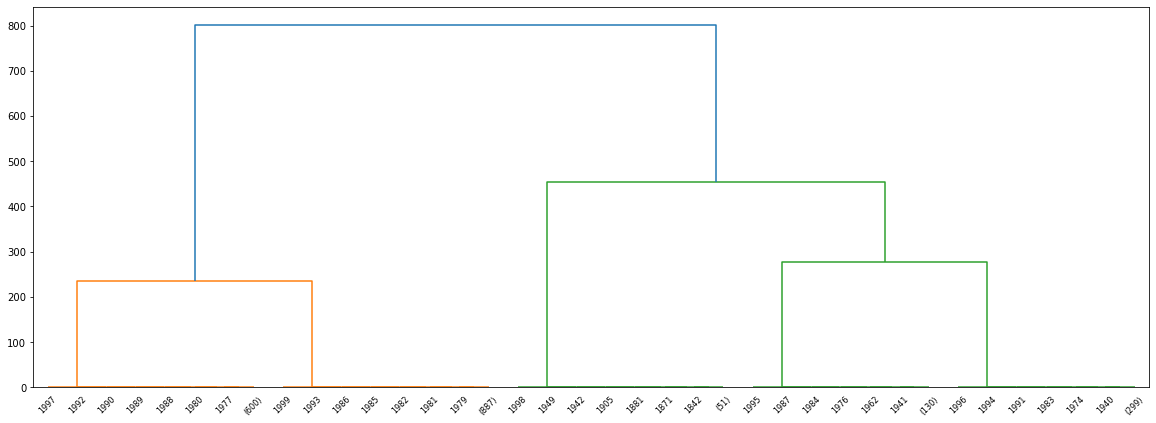

In [78]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(cluster_centre, 'ward')

plt.figure(figsize=(20, 7))
plt.xticks(rotation=90)
dn = hierarchy.dendrogram(Z, truncate_mode='level', p=8)

In [57]:
cutree = hierarchy.cut_tree(Z, height=600)
cutree

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [58]:
X_counts['cluster2_']=cutree
X_counts['cluster2_'].value_counts()

1    1501
0     499
Name: cluster2_, dtype: int64

In [60]:
for i in range(1,3):
    print('Cluster ', i-1, ' : ',
          X_counts[X_counts.cluster2_==i-1].mean().sort_values(ascending=False).head(60).index.to_list(), '\n')

Cluster  0  :  ['snobby', 'departure', 'menschkeit', 'archibald', 'snide', 'vaguely', 'veronika', 'polynesian', 'anthem', 'erbil', 'practically', 'mating', 'playbook', 'submarines', 'impossible', 'nicholson', 'politicians', 'britain', 'glorified', 'harwood', 'witnessing', 'ramos', 'melting', 'inhumane', 'tesis', 'painter', 'wide', 'sunshine', 'felt', 'meatballs', 'eccentrically', 'gaggle', 'nobly', 'mechanical', 'cluster_', 'playfulness', 'billion', 'flea', 'bootleg', 'snowy', 'giorgio', 'blowed', 'politics', 'nicole', 'jared', 'undying', 'eulogy', 'startling', 'inhumanity', 'gall', 'expression', 'commemorate', 'executing', 'traced', '27', 'libido', 'decisive', 'railways', 'primitively', 'uninformed'] 

Cluster  1  :  ['snobby', 'departure', 'menschkeit', 'archibald', 'polynesian', 'snide', 'vaguely', 'erbil', 'veronika', 'anthem', 'cluster_', 'harwood', 'submarines', 'impossible', 'playbook', 'mating', 'practically', 'melting', 'nicholson', 'cluster2_', 'ramos', 'glorified', 'painter'

In [67]:
y_2.value_counts()

1    1000
0    1000
Name: y, dtype: int64

In [66]:
X_counts["cluster2_"].value_counts()

1    1501
0     499
Name: cluster2_, dtype: int64